In [196]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [197]:
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE+5)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [198]:
# This is the path where you want to search
path = "/home/julius/Documents/Julius_03_x_auswertung"
os.makedirs("plots", exist_ok=True)
# this is the extension_nerfacto_uncentered you want to detect
extension_nerfacto_uncentered = 'nerfacto.csv'
all_files_nerfacto_uncentered = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_nerfacto_uncentered in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_nerfacto_uncentered.append(file_name_path)  # This is the full path of the filt

all_files_nerfacto_uncentered = sorted(all_files_nerfacto_uncentered)
tmp_list = []

for filename in all_files_nerfacto_uncentered:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

master_df_nerfacto_uncentered = pd.concat(tmp_list, axis=0, ignore_index=True)


In [199]:
# this is the extension_nerfacto_124 you want to detect
extension_nerfacto_124 = 'nerfacto_124.csv'
all_files_nerfacto_124 = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_nerfacto_124 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_nerfacto_124.append(file_name_path)  # This is the full path of the filt

all_files_nerfacto_124 = sorted(all_files_nerfacto_124)
li = []

for filename in all_files_nerfacto_124:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

master_df_nerfacto_124 = pd.concat(li, axis=0, ignore_index=True)

In [200]:
# this is the extension_instant_dex you want to detect
extension_instant_dex = 'instant-dex_nerf.csv'
all_files_instant_dex = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_instant_dex in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_instant_dex.append(file_name_path)  # This is the full path of the filt

all_files_instant_dex = sorted(all_files_instant_dex)
tmp_list = []

for filename in all_files_instant_dex:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

master_df_instant_dex = pd.concat(tmp_list, axis=0, ignore_index=True)

In [201]:
# this is the extension_instant_dex_124 you want to detect
extension_instant_dex_124 = 'instant-dex_nerf_124.csv'
all_files_instant_dex_124 = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_instant_dex_124 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_instant_dex_124.append(file_name_path)  # This is the full path of the filt

all_files_instant_dex_124 = sorted(all_files_instant_dex_124)
tmp_list = []

for filename in all_files_instant_dex_124:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

master_df_instant_dex_124 = pd.concat(tmp_list, axis=0, ignore_index=True)


In [202]:
# this is the extension_nerfacto_centered you want to detect
extension_nerfacto_centered = 'nerfacto2_centered.csv'
all_files_nerfacto_centered = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_nerfacto_centered in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_nerfacto_centered.append(file_name_path)  # This is the full path of the filt

all_files_nerfacto_centered = sorted(all_files_nerfacto_centered)
tmp_list = []

for filename in all_files_nerfacto_centered:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

master_df_nerfacto_centered = pd.concat(tmp_list, axis=0, ignore_index=True)


In [203]:
# this is the extension_nerfacto_centered_124 you want to detect
extension_nerfacto_centered_124 = 'nerfacto_2_centered_124.csv'
all_files_nerfacto_centered_124 = []
for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if extension_nerfacto_centered_124 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_nerfacto_centered_124.append(file_name_path)  # This is the full path of the filt

all_files_nerfacto_centered_124 = sorted(all_files_nerfacto_centered_124)
tmp_list = []

for filename in all_files_nerfacto_centered_124:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

master_df_nerfacto_centered_124 = pd.concat(tmp_list, axis=0, ignore_index=True)

In [204]:
data_nerfacto_uncentered = master_df_nerfacto_uncentered.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
data_nerfacto_124 = master_df_nerfacto_124.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
data_instant_dex = master_df_instant_dex.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
data_instant_dex_124 = master_df_instant_dex_124.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
data_nerfacto_centered = master_df_nerfacto_centered.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()
data_nerfacto_centered_124 = master_df_nerfacto_centered_124.groupby(["Scene", "Subsample"])['Mean'].mean().to_frame()



In [205]:
# This is the path_sensor where you want to search
path_sensor = "/home/julius/Documents/Julius_03"

# this is the extension_nerfacto_uncentered you want to detect
extension1 = 'ONLY_NON_ZERO_COMP.csv'
extension2 = 'sensor.csv'
all_files_only_non_zero = []
all_files_sensor = []
for root, dirs_list, files_list in os.walk(path_sensor):
    for file_name in files_list:
        if extension1 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_only_non_zero.append(file_name_path)  # This is the full path of the filt
            
        elif extension2 in file_name:
            file_name_path = os.path.join(root, file_name)
            all_files_sensor.append(file_name_path)  # This is the full path of the filt

all_files_only_non_zero = sorted(all_files_only_non_zero)
all_files_sensor = sorted(all_files_sensor)

tmp_list = []
for filename in all_files_only_non_zero:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

sensor_only_non_zero_df = pd.concat(tmp_list, axis=0, ignore_index=True)

sensor_only_non_zero_df.head(10)

tmp_list = []
for filename in all_files_sensor:
    df = pd.read_csv(filename, index_col=0, header=0)
    tmp_list.append(df)

sensor_only_df = pd.concat(tmp_list, axis=0, ignore_index=True)

In [206]:
scenes = list(data_nerfacto_uncentered.index.get_level_values('Scene').unique())
subsamples = list(data_nerfacto_uncentered.index.get_level_values('Subsample').unique())

sensor_only_data = sensor_only_df.groupby(["Scene"])['Mean'].mean().to_frame()
sensor_only_non_zero_data = sensor_only_non_zero_df.groupby(["Scene"])['Mean'].mean().to_frame()


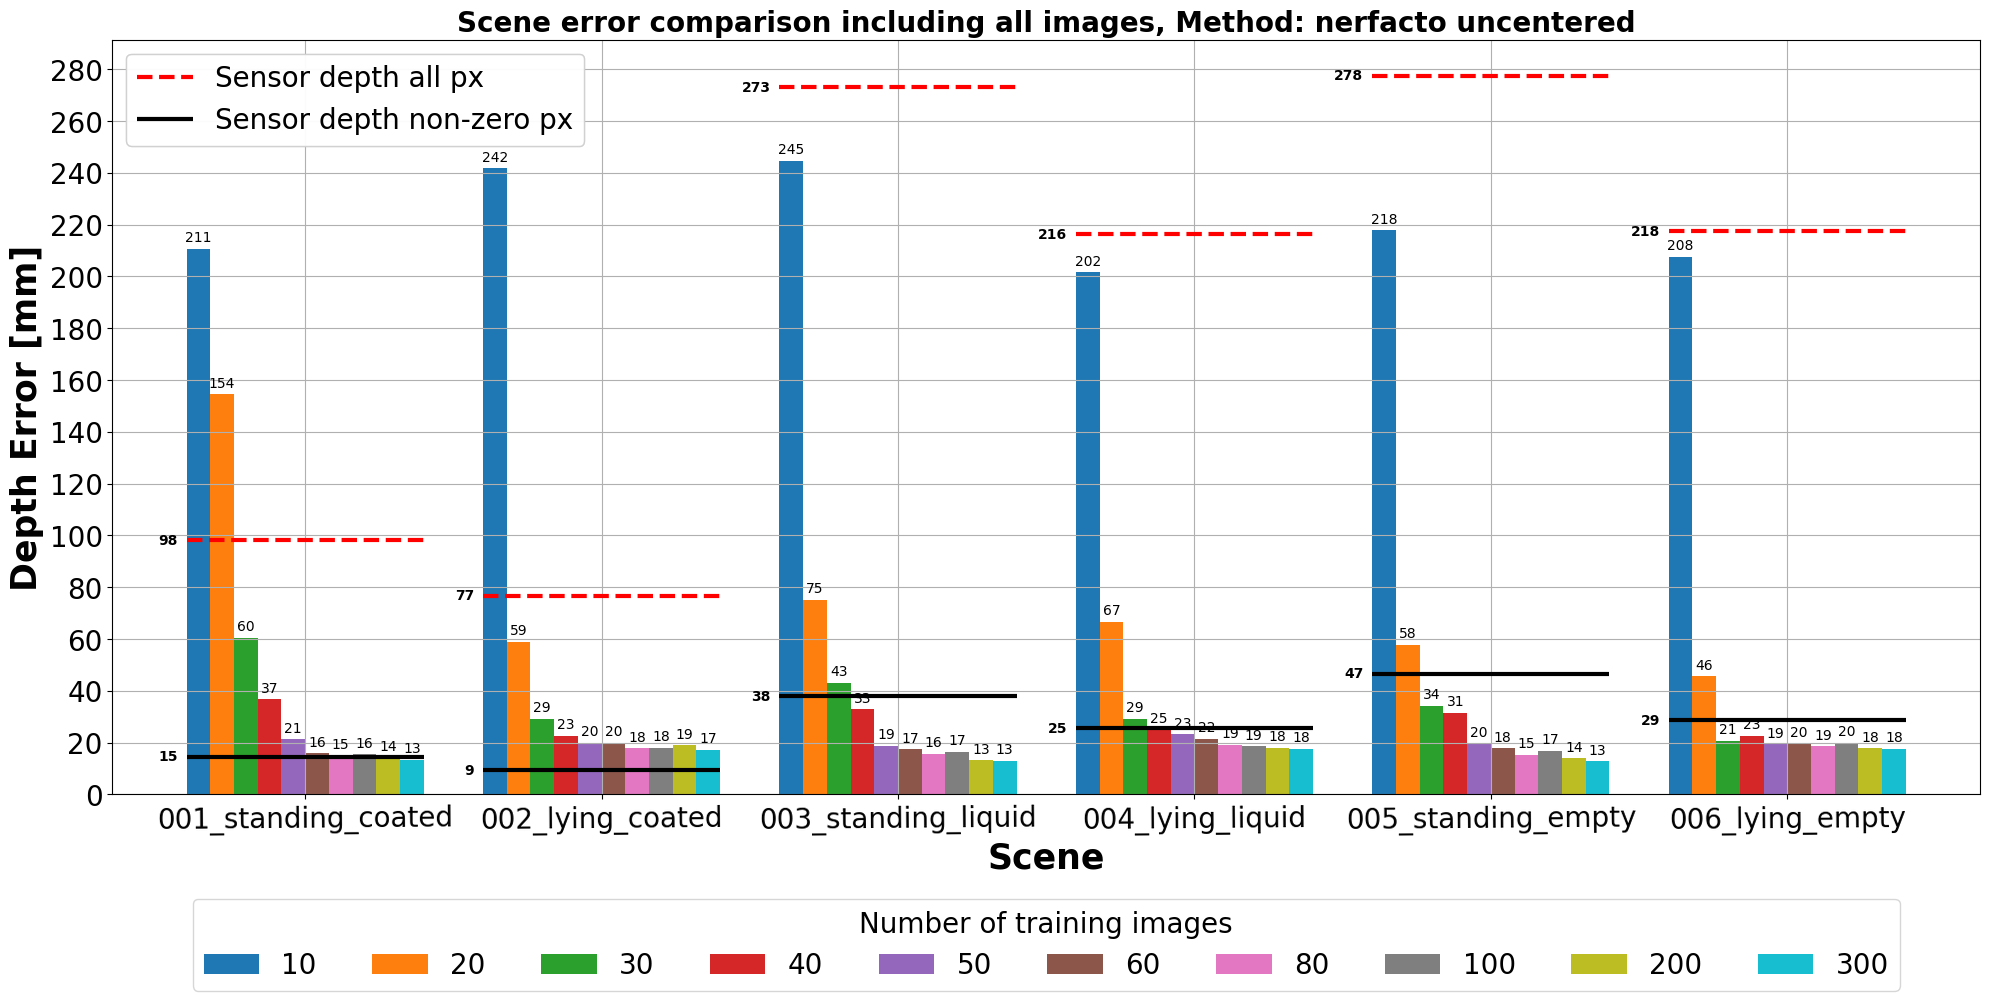

In [207]:
ax = data_nerfacto_uncentered.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including all images, Method: nerfacto uncentered", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_all_imgs_nerfacto.pdf")
#print(data_nerfacto_uncentered.unstack())

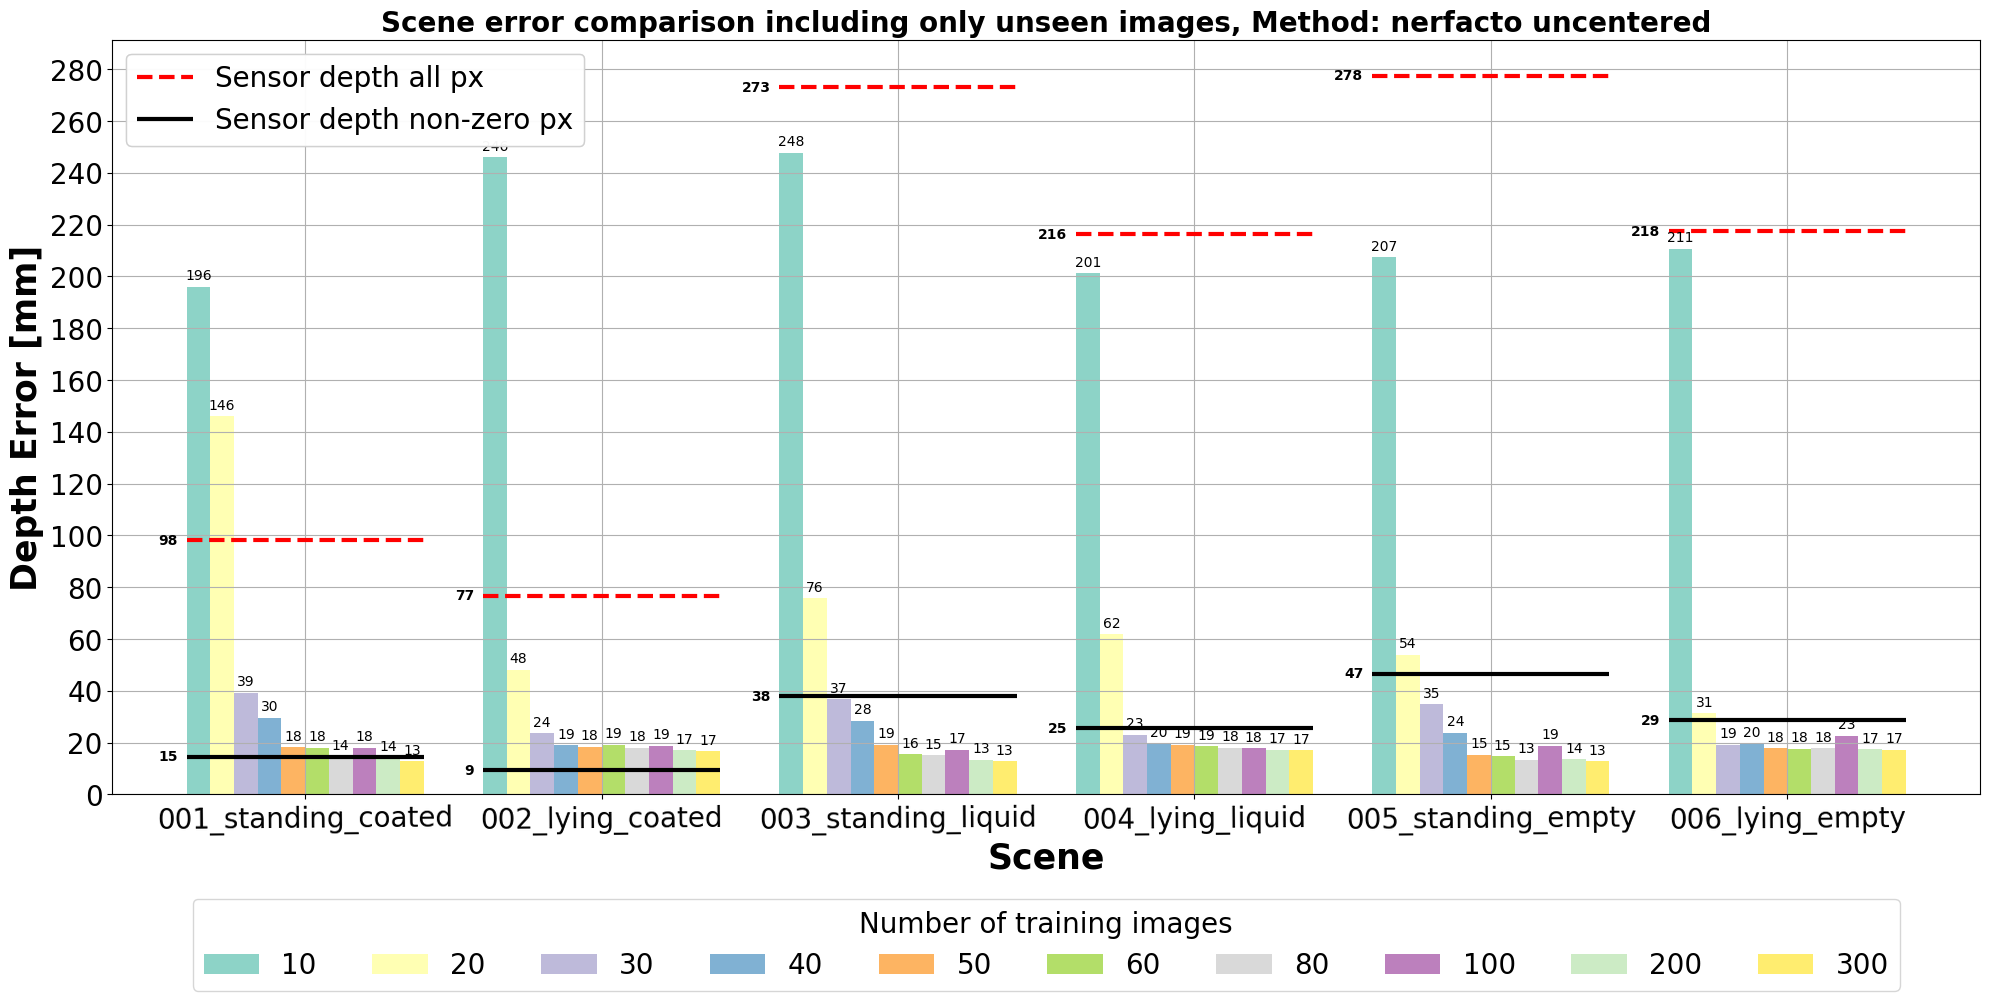

In [208]:
ax = data_nerfacto_124.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8, colormap='Set3')
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including only unseen images, Method: nerfacto uncentered", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_124_imgs_nerfacto.pdf")

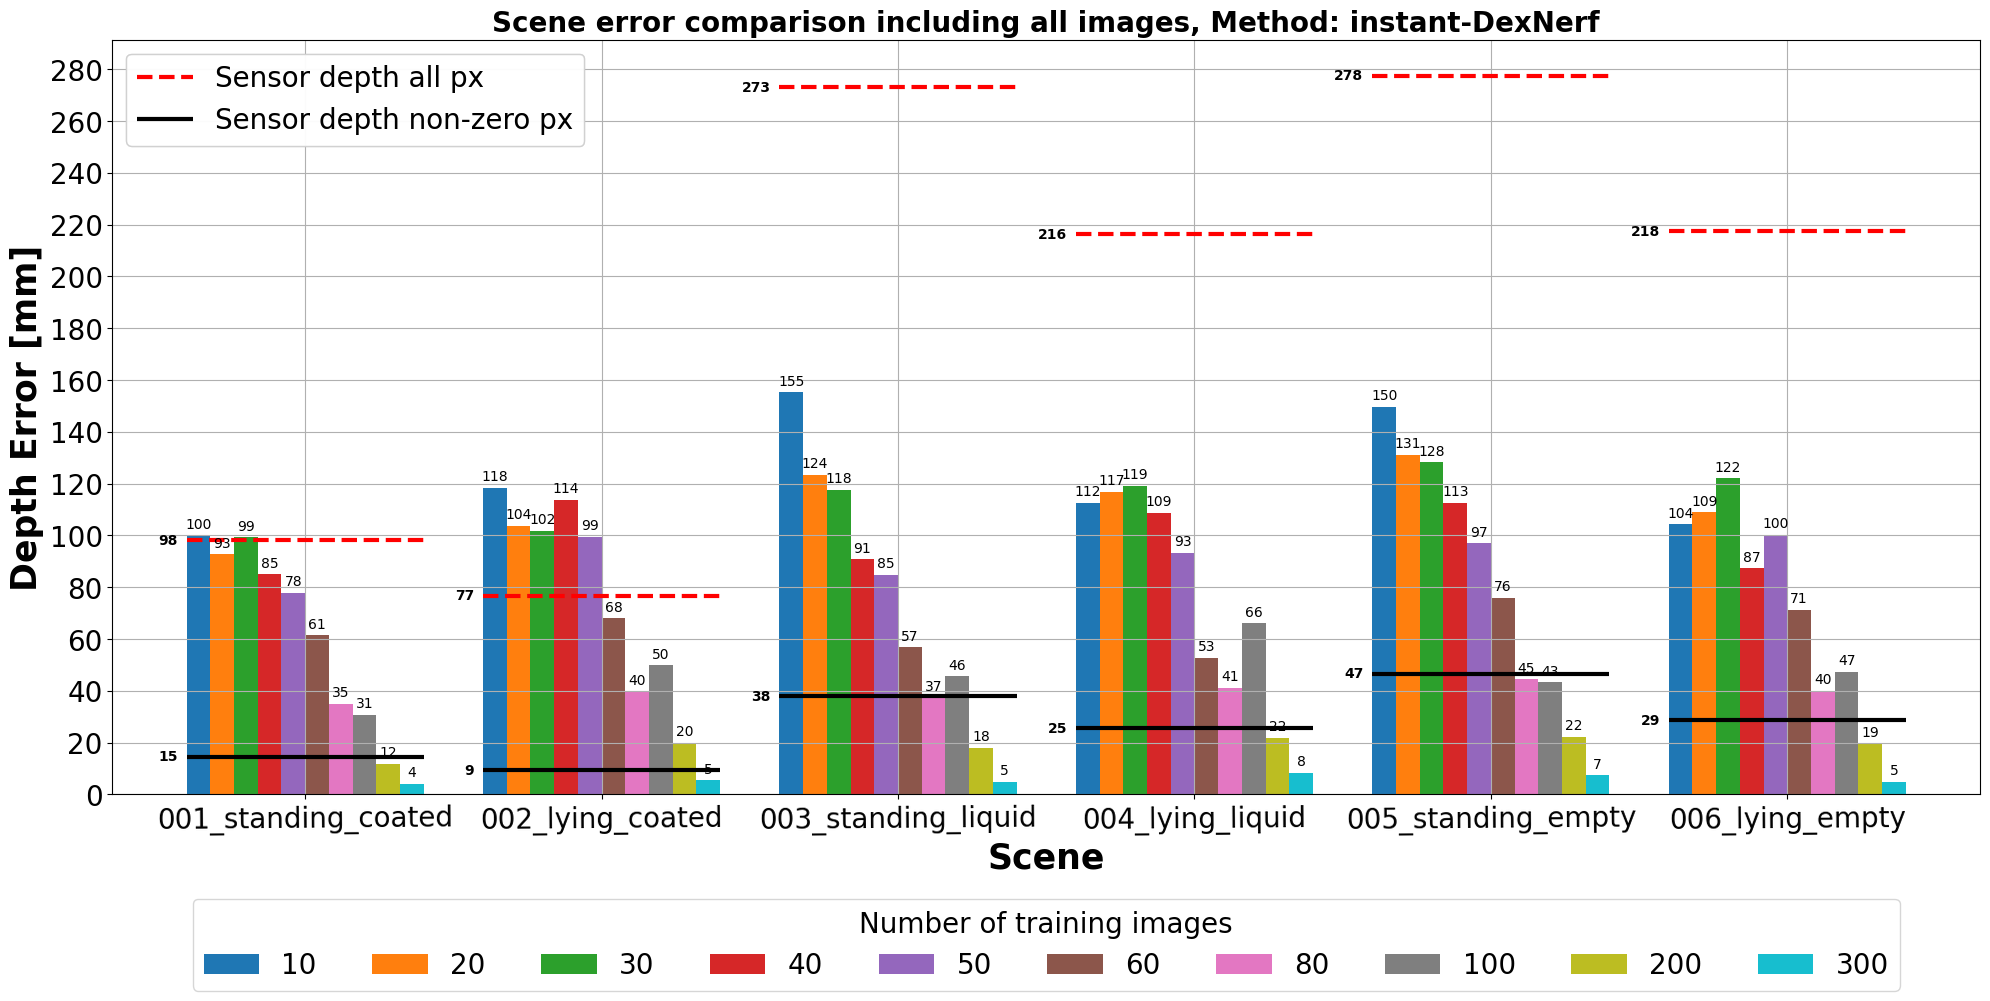

In [209]:
ax = data_instant_dex.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including all images, Method: instant-DexNerf", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_all_imgs_instant-DexNerf.pdf")

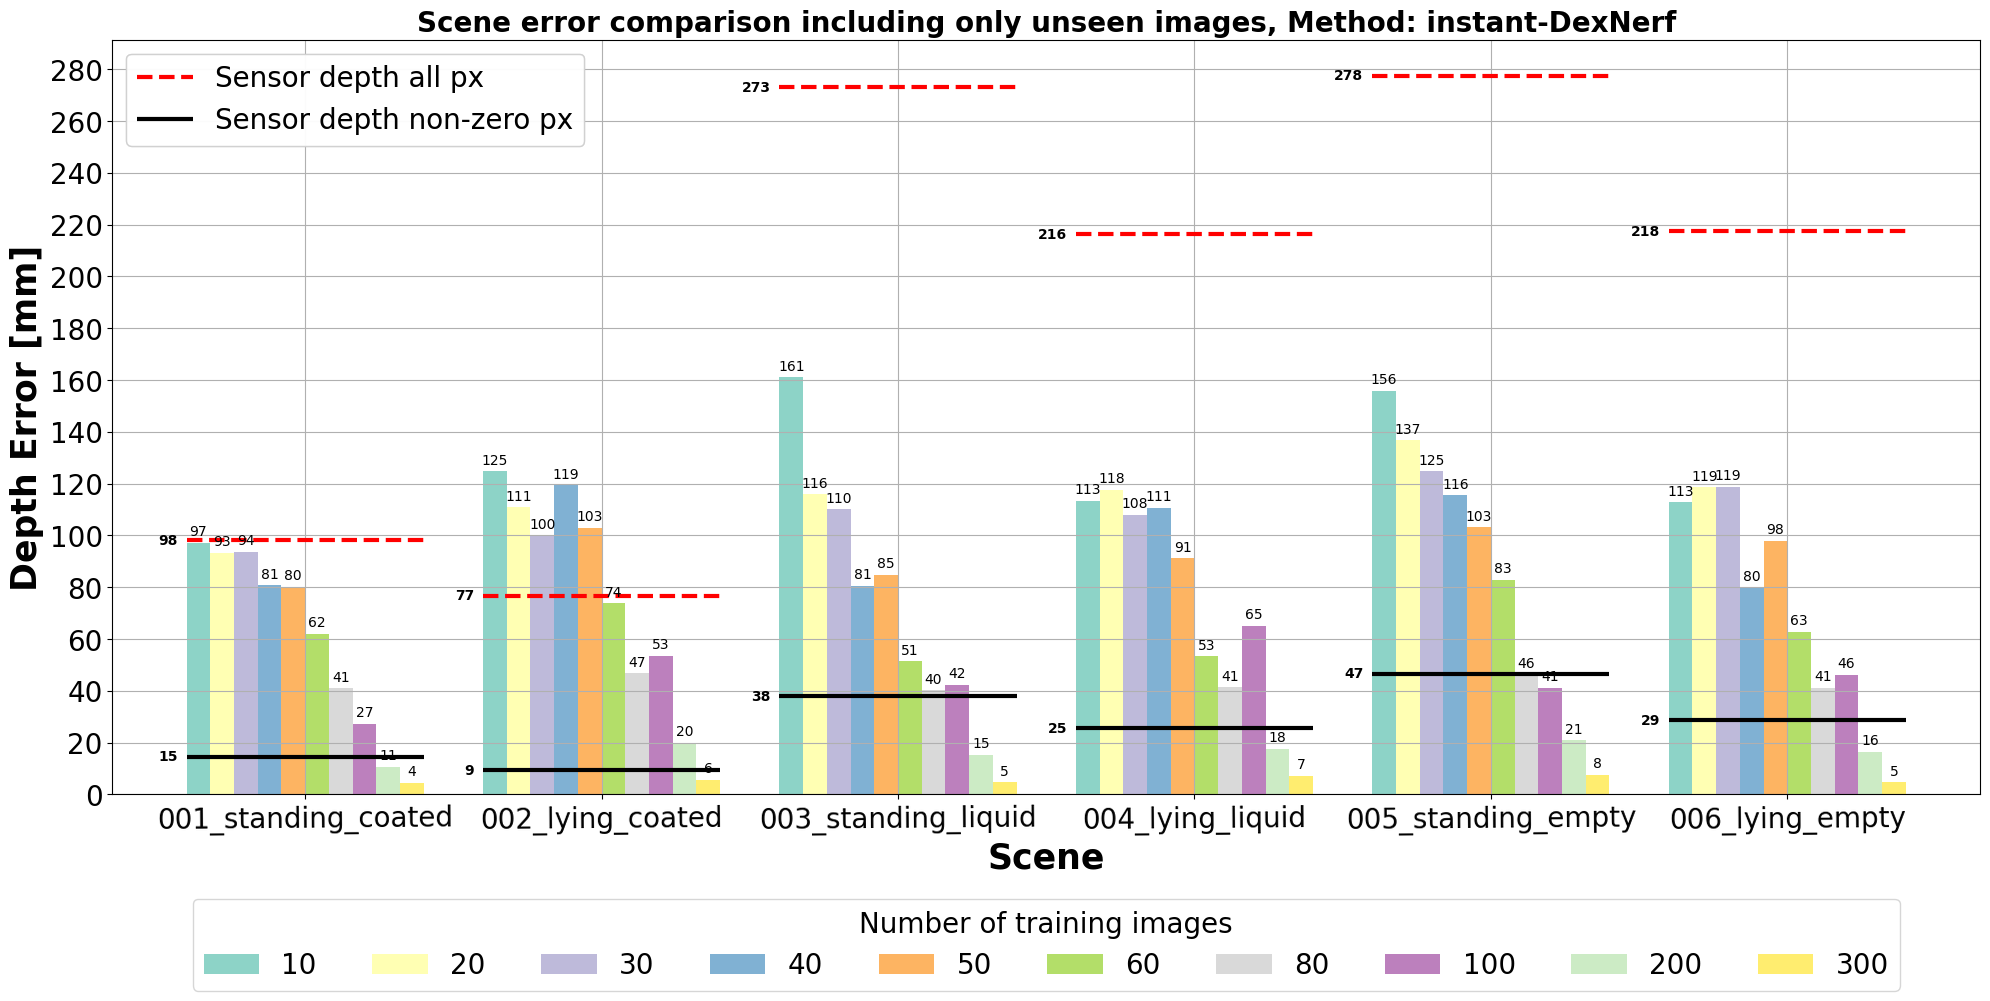

In [210]:
ax = data_instant_dex_124.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8, colormap='Set3')
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including only unseen images, Method: instant-DexNerf", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_124_imgs_instant-DexNerf.pdf")

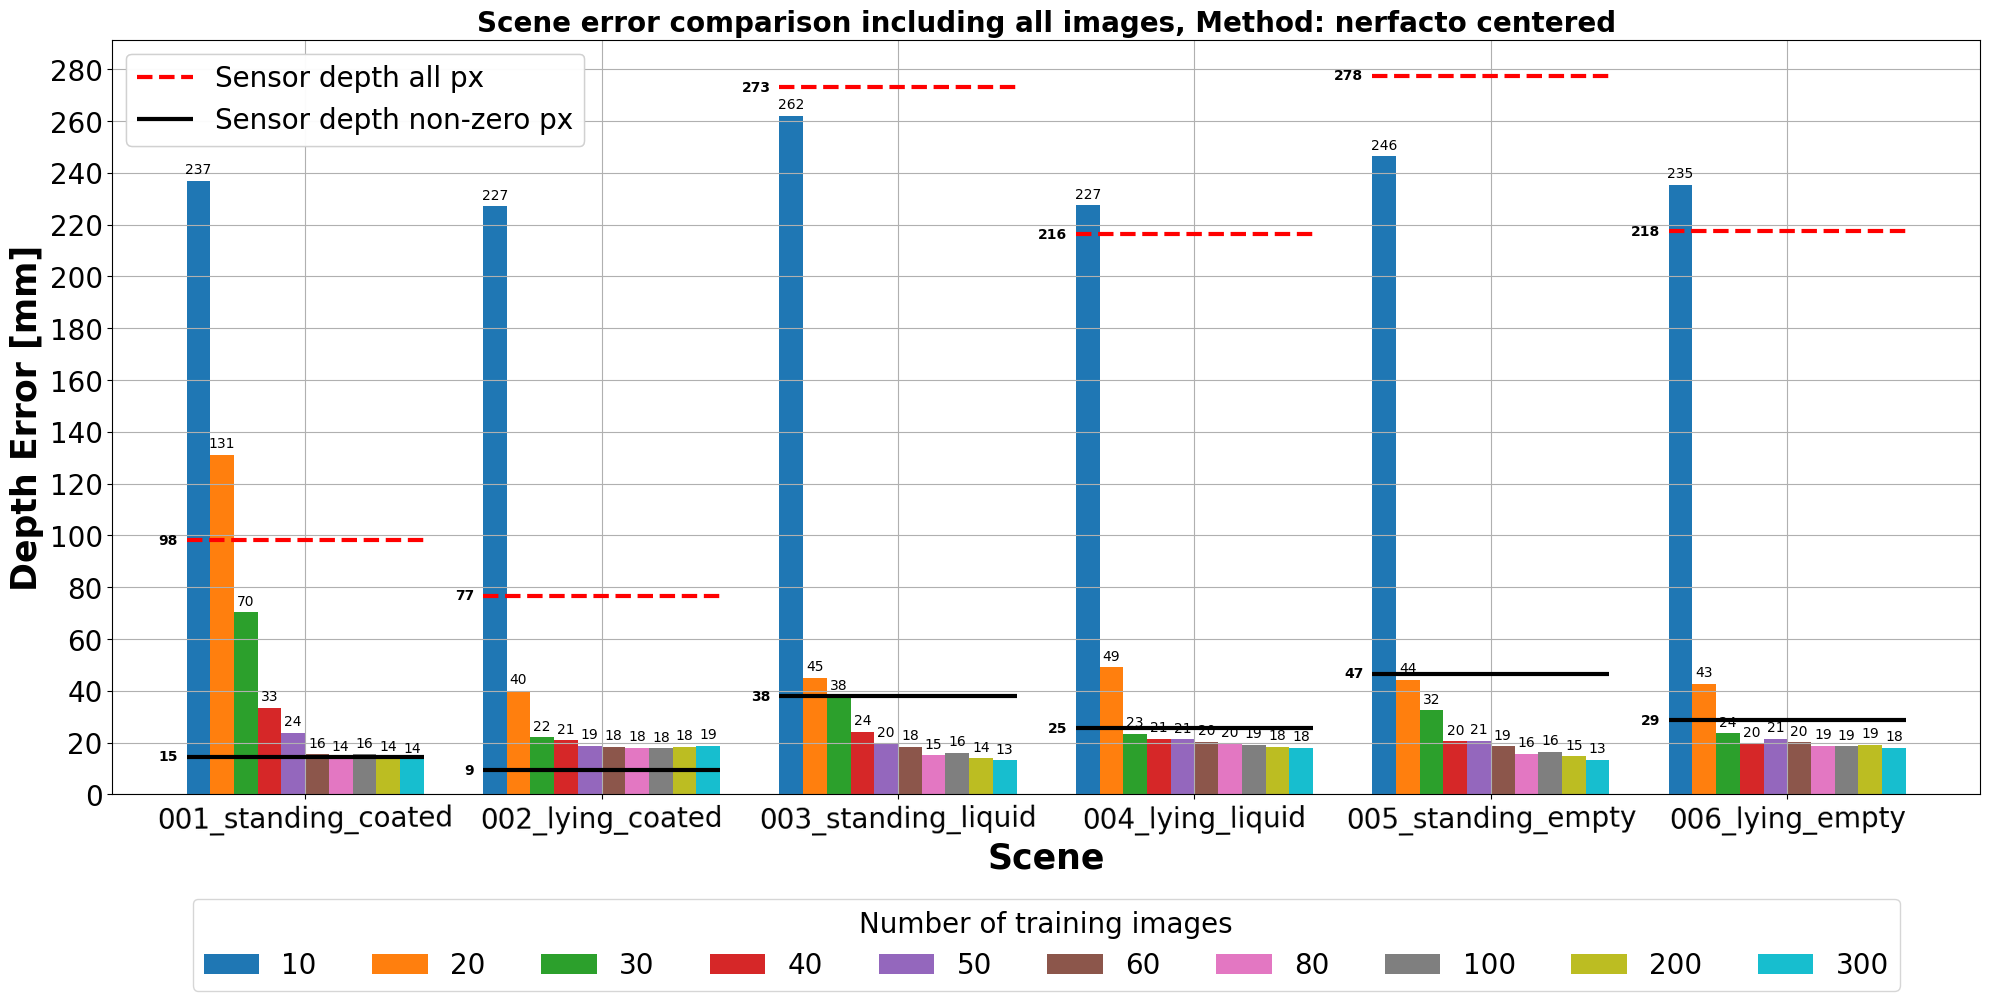

In [211]:
ax = data_nerfacto_centered.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including all images, Method: nerfacto centered", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_all_imgs_nerfacto2_centered.pdf")

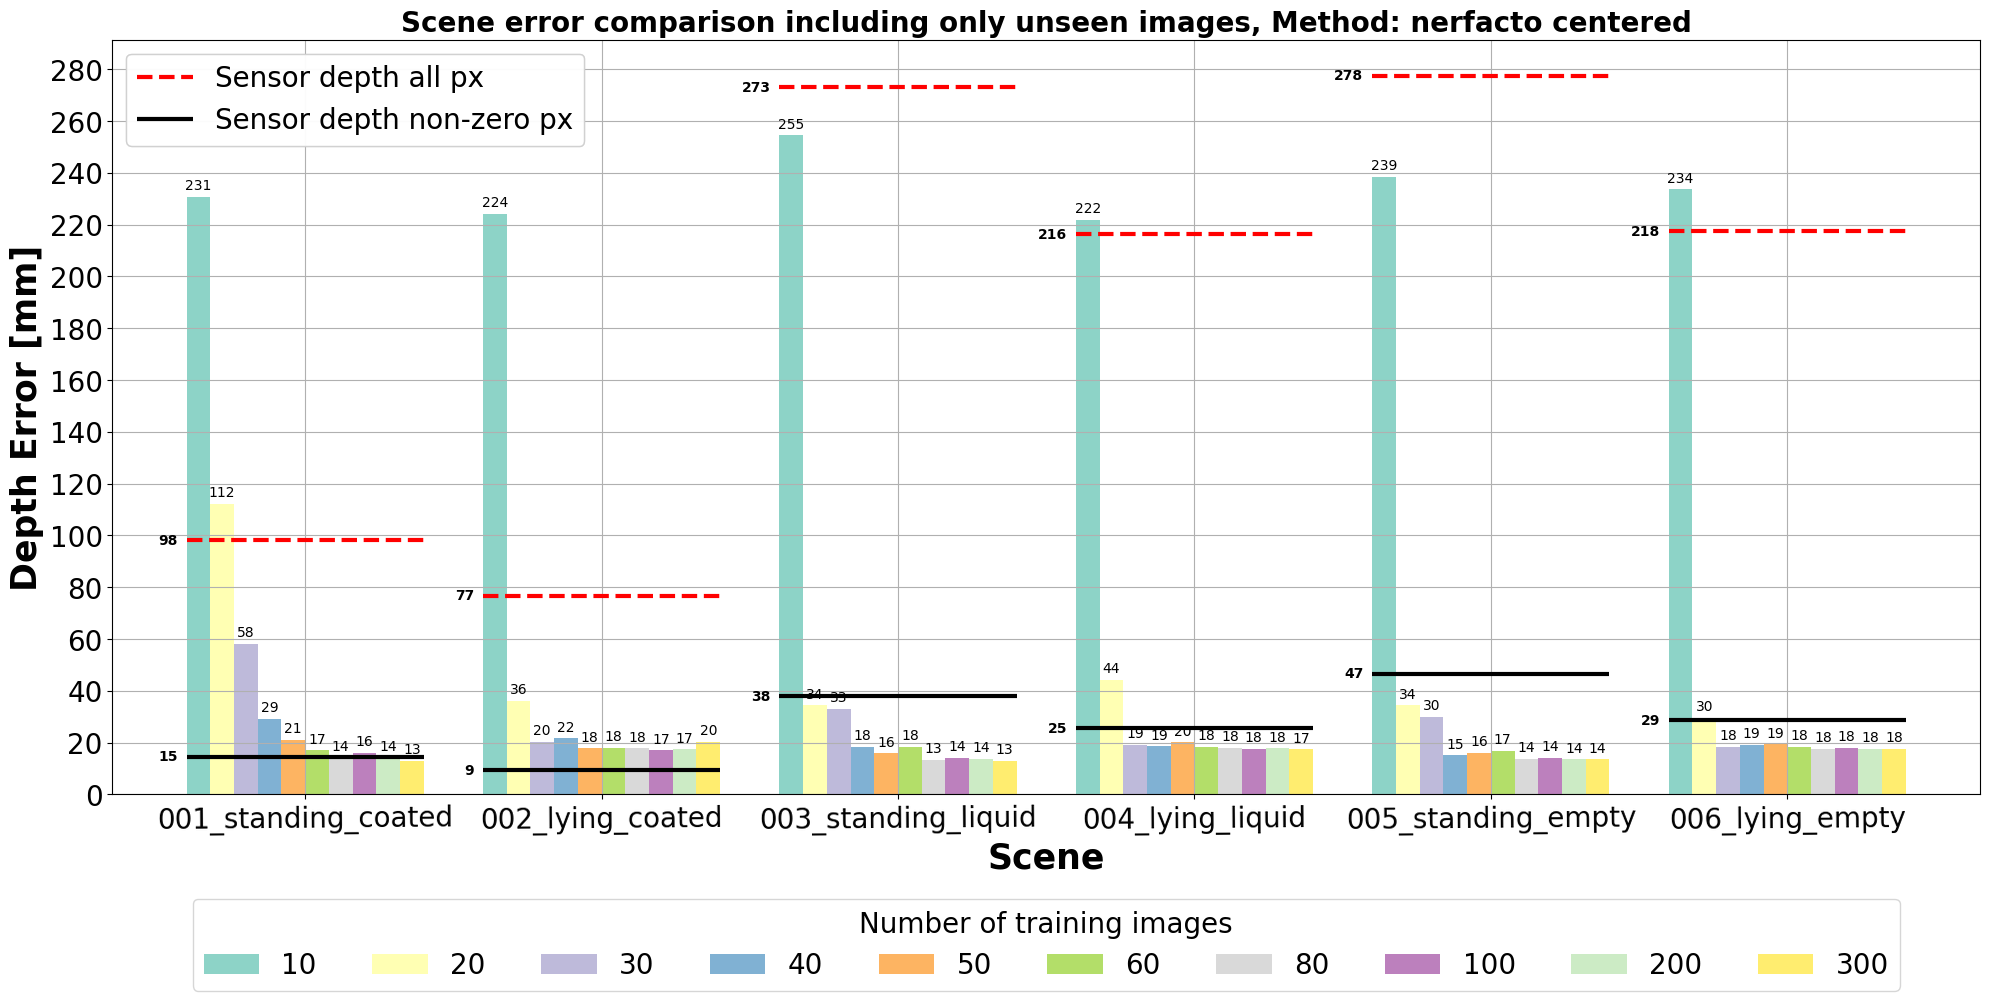

In [212]:
ax = data_nerfacto_centered_124.unstack().plot(kind='bar', figsize=(20,10),  grid=True, yticks=np.arange(0,281,20), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8, colormap='Set3')
ax.set_xlabel("Scene", fontweight="bold")
ax.set_ylabel("Depth Error [mm]", fontweight="bold")
for idx, c in enumerate(ax.containers):
    # set the bar label
    #print(c[0])
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=3)

legend1 = plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc="upper center", bbox_to_anchor=(0.5, -0.12, 0, 0), ncol=10, title='Number of training images')# loc='upper right', bbox_to_anchor=(1, 0.75), title='Nr. of\ntraining\nimages')
legend1.get_title().set_fontsize('20') #legend 'Title' fontsize
#plt.setp(plt.gca().get_legend().get_texts(), fontsize='12') #legend 'list' fontsize

for idx, scene in enumerate(scenes):    
    height = sensor_only_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='red', linewidth=3, linestyles="dashed")
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")

    height = sensor_only_non_zero_data['Mean'].loc[scene]
    line = ax.hlines(height,idx-0.4,idx+0.4, colors='black', linewidth=3, linestyles="solid")
    # plt.text(idx,height+5, s= f'{height:.0f}', ha='center', va='center')
    plt.text(idx-0.43,height, s= f'{height:.0f}', ha='right', va='center', fontweight="bold")
    

legend2 = plt.legend(["Sensor depth all px", "Sensor depth non-zero px"], loc='upper left', bbox_to_anchor=(0, 1))
legend2.get_title().set_fontsize('20') 

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.title("Scene error comparison including only unseen images, Method: nerfacto centered", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig("plots/Scene_error_comp_124_imgs_nerfacto2_centered.pdf")